# Midterm 4 Review
### ECE204 Data Science & Engineering

### 1) Classification

#### Short-answer questions
* What type of label does a classification problem predict?
    * Categorical label
* Once a decision tree classifier has been trained, how does it generate predictions for unlabeled data?
    * It traverses the tree from root to leaf using a feature based rule, then assigns the class label at each leaf node where the data point lands.
* How does a nearest neighbor classifier generate a prediction for unlabeled data?
    * It calculates the Eucledian distance to all training points, then see what labels those nearby points have — the new point gets the most common label among them.



#### Coding questions

**Problem 1.**
Train a decision tree classifier on the `airports.csv` dataset with `random_state=42` and `max_depth=4`. Predict the state from the latitude and longitude. **Which is the more important feature: latitude or longitude?**

*Hint:* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [1]:
import pandas as pd
df = pd.read_csv("airports.csv")
df.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df[["latitude", "longitude"]]
y = df["state"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model_fit = model.fit(X_train, y_train)
model.feature_importances_

array([0.6240954, 0.3759046])

---
**Problem 2.** **Using the same datasets and model, what is the accuracy of the model?**

In [4]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.3143712574850299

The question asks for the "accuracy of the model." This value summarizes the quality of the model. The goal is to predict well on *unseen* data, so it only makes sense to report the accuracy on the **unseen test data** (unless specifically asked about training or validation accuracy).

---

### 2) Regression

#### Short-answer questions
* What type of variables do regression problems predict?
    * Continuous numeric values
* What is a residual?
    * The difference between the actual value and the predicted value
* How can you interpret the regression coefficients (the $\beta_i$ coefficients)
    * Each beta represents the estimated change in the target value for a one unit change in the corresponding feature x, holding all other features constant.

#### Coding questions

**Problem 1.** 
Read in the "housing.csv" dataset. Predict the price from **all** the other features. **What is the coefficient of determination (R-squared, or $R^2$) value on the test set?**

Use the provided test and train set when reporting your answer.

*Hint:* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:
df = pd.read_csv("housing.csv")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,lat,long,price
0,3,1.00,1180,5650,1.0,0,3,7,0,47.5112,-122.257,221900
1,3,2.25,2570,7242,2.0,0,3,7,400,47.7210,-122.319,538000
2,2,1.00,770,10000,1.0,0,3,6,0,47.7379,-122.233,180000
3,4,3.00,1960,5000,1.0,0,5,7,910,47.5208,-122.393,604000
4,3,2.00,1680,8080,1.0,0,3,8,0,47.6168,-122.045,510000


In [6]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :-1]
# X = df.drop(columns=['price'])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
linear = LinearRegression()
linear_fit = linear.fit(X_train, y_train)
linear_fit.score(X_test, y_test)

0.655193446661624

In [8]:
from sklearn.metrics import r2_score

y_pred = linear_fit.predict(X_test)
r2_score(y_test, y_pred)

0.655193446661624

---
**Problem 2.**
Using the same dataset and model, **what's the residual sum of squares (RSS) on the training set?** Compute it in two different ways:
* by computing the residuals, squaring them, and summing them up
* by using the `mean_squared_error` built-in function (careful! this computes the **mean** of the squared residuals instead of the **sum**)

See if you can get the same answer in two different ways!

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
y_pred_train = linear_fit.predict(X_train)
msqe = mean_squared_error(y_train, y_pred_train) * len(y_train)
msqe

876415238127599.5

In [11]:
residual = y_train - y_pred_train
rss = (residual ** 2).sum()
rss

876415238127599.5

This question asks about the value of the *train* dataset. This is a little unusual; normally, quality is determined from the test set. However, we ask this question because `LinearRegression`'s `fit` minimizes the "mean squared error" or "sum of squared residuals". That is, the "sum of squared residuals" for the train set can not possibly be any lower than reported.

For $n$ examples, the Scikit-Learn metric `mean_squared_error` calculates

$$\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

with prediction $\hat{y}_i$ for example $i$ with ground truth label $y_i$. This could equivalently be called "squared mean of residuals". If multiplied by $n$, this is exactly the RSS.

---

### 3) Model selection

**Principle for model selection:** only evaluate model performance on examples it has never seen.

#### Short answer questions

* What are hyper-parameters?
    * External settings or configuration values that are set before the model is trained, not learned from the data. They are manually set by the user, k in knn, max depth in decision trees, etc.
* Why shouldn't the same dataset be used to train a model and evaluate performance of that model? (the data used to train a model is the "train data", and the data used to evaluate the performance is the "test data") 
    * It leads to overfitting/over optimism. Evaluating on the same data won't tell you how well the model will perform on an unseen data set.
* Explain the difference between a **training set**, a **validation set** and a **testing set**.
    * Training set: data the model learns from
    * Validation set: Used to tune hyper-parameters, or select the best model
    * Testing set: Final evaluation on unseen data

#### Coding questions
These questions will use a synthetic dataset. 

<Axes: xlabel='x0', ylabel='x1'>

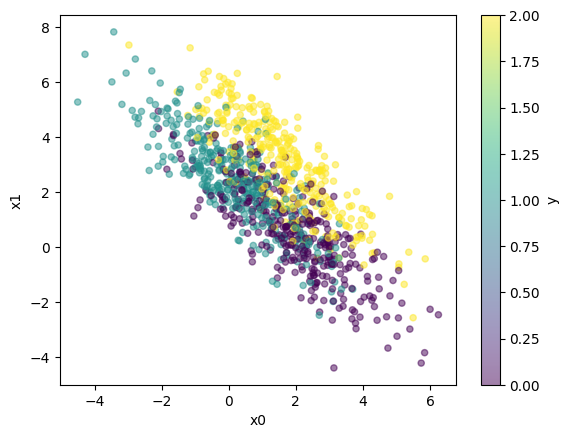

In [12]:
from sklearn.datasets import make_blobs
import sklearn.datasets as datasets
import numpy as np

X, y = datasets.make_blobs(n_samples=1000, random_state=190, cluster_std=2.0)
# Try out different datasets:
#X, y = datasets.make_blobs(n_samples=1000, random_state=170, cluster_std=2.0)
#X, y = datasets.make_blobs(n_samples=1000, random_state=120, cluster_std=2.0)

transformation = [[0.6, -0.3], [-0.4, 0.8]]
X = np.dot(X, transformation)
df = pd.DataFrame({"x0": X[:, 0], "x1": X[:, 1], "y": y})
df.plot.scatter(x="x0", y="x1", c="y", cmap="viridis", alpha=0.5)

---
**Problem 1.**
Using a decision tree classifier, **what's the cross validation score for `max_depth=3` using 5-fold cross validation on the train set?** Use `random_state=42` for the DecisionTreeClassifier.

More cross validation details available at https://scikit-learn.org/stable/modules/cross_validation.html.

In [13]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model_fit = model.fit(X_train, y_train)
# model_pred = model.predict(X_test)
cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
round(cv_score, 3)

0.651

---
**Problem 2.**
**What's the best value for `max_depth` on the train set?**

Train the model with `max_depth` from 1 to 10 inclusive. Use 5-fold cross-validiton with `cv=5` and `random_state=42` for the `DecisionTreeClassifier`.  Create a plot that shows `max_depth` on the horizontal axis, and the average perfomance across the folds on the vertical axis. 

Text(0, 0.5, 'Cross Validation Score')

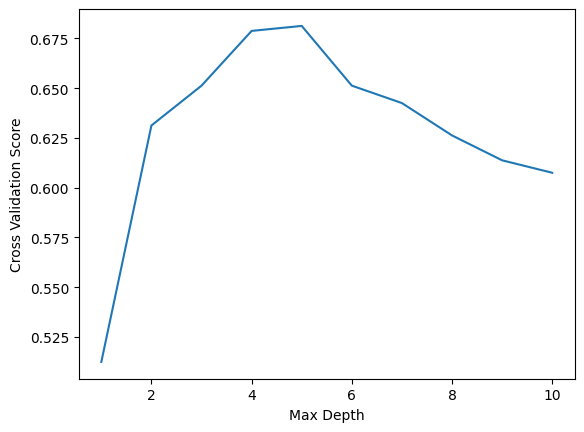

In [15]:
import matplotlib.pyplot as plt

cv_scores = []

for k in range(1, 11):
    model = DecisionTreeClassifier(max_depth=k, random_state=42)
    model_fit = model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    cv_scores.append(cv_score)

plt.plot(range(1, 11), cv_scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross Validation Score')

---
**Problem 3.**
**What's the accuracy of the classifier with the best `max_depth` found above?**

Retrain the classifier using `random_state=42` and report the accuracy *on the test set*.

In [16]:
import numpy as np

best_max_depth = np.argmax(cv_scores) + 1
best_max_depth

5

---